In [1]:
import numpy as np
import matplotlib.pyplot as plt


### define the prior over the parameters
the prior can be put into the return line. I think our parameter space is 3 dimensional, so I used 3 parameters but that can be easily changed.
If mode=Normal or mode=Uniform gives normal(mean=0,var=1)/uniform(1,2) priors. mode=None allows us to set different arbitrary functions for each prior.prior_1, prior_2, prior_3, prior_4 is what we might have to edit to fit the new task (hopefully the priors dont actually depend on where we are in parameter space).

I am not sure if our priors are going to be dependent on our parameters or not. If they are, we will need to add a function that gives us the probability of a particulat set of parameters (it is used in the metropoplis algorith) so I set up a dummy function, we might need to change it later.

In [332]:
def get_params_from_prior(params, mode=None):
    if mode == 'normal' :
        return np.random.normal(0,1,len(params))
    if mode == 'uniform' :
        return 1+np.random.uniform(0,1,len(params))
    else :
        #the line below is just here in case the prior depends on the parameters
        #p1, p2, p3 = params
        prior_1 = np.random.uniform(1,4)
        prior_2 = np.random.uniform(.1, 3)
        prior_3 = np.random.uniform(-2, 2)
        return [prior_1, prior_2, prior_3]
    
def prior_prob(params):
    return(1)



### define the posterior given a set of parameters and a data set
pretty straightforward, we calculate the marginal probabilities of each data point and then take the product to find the joint probability(probability of the whole data set). marginal_probs is the part we will have to edit to fit our new task.

Here we are just using p1 is the estimate of e and p3 is the estimate of the offset (assuming guassian signal)

In [324]:
def posterior_prob(params, data):
    p1, p2, p3 = params
    marginal_probs=np.sqrt(np.log(p1)) * p1**(-(data-p3)**2/2)
    return np.prod(marginal_probs)


### metropolis part

Everything nontrivial is defined elsewhere, this is just a very straightforward fuction that returns False if we reject the candidate and True if we accept.


In [325]:
def metropolis(params, candidate_params, data):
    
    def get_prob(params):
        return prior_prob(params)*posterior_prob(params, data)
    
    threshhold = min(1, get_prob(candidate_params)/get_prob(params))
    decide=np.random.uniform(0,1,1)
    
    if threshhold > decide:
        return(True)
    if threshhold < decide:
        return(False)


### the chain
we start with some starting place for each parameter (in the case where the prior probs dont depend on location in parameter spacde, this doesnt matter at all). Next generate a candidate mode, and use the metropolis function above to decide if we want to make that move or not.


In [326]:
start_seed = np.random.uniform(1,3,3)

def chain(N, data, max_trials):
    chain=[]
    chain.append(get_params_from_prior(start_seed))
    current = chain[0]
    i=0
    while len(chain) < N and i < max_trials:
        candidate = get_params_from_prior(current)
        i += 1
        if metropolis(current, candidate, data):
            chain.append(candidate)
            current = candidate
    print('trials:{}'.format(i))
    return(np.asarray(chain))

Just to test it

trials:2465


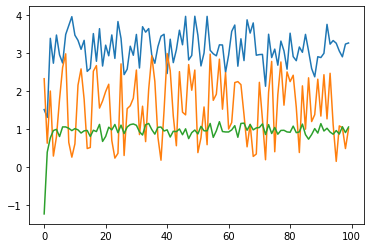

In [337]:
data=np.random.normal(1,1,100)
chn=chain(100, data, 10000)
plt.plot(chn)